# Simulating the double well model
In this document, the perfect integrator model, the drift diffusion absorbing model and the drift diffusion reflecting model will be simulated and the parameters of each one will be changed in order to understand the role of each variable.

In [10]:
# First, the libraries to be used will be imported:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [11]:
# Then, the variables that will not change throughout the simulation will be defined:
sigma_i = 0 # I consider that there is no internal noise
xi_i = 0
tau = 200 #ms
tf = tau/40 #ms

## Perfect Integrator
In the first simulation the mu value will be varied from the start mu value to the final mu value, and the error of each mu value will be computed (for a thousand iterations):

Text(0,0.5,'Decision value')

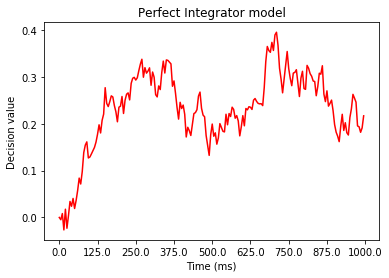

In [12]:
sigma_s = 0.15
mu = 0.05
x = 0
alfa = 0.1
decision_value = [x]
for i in range(199):
    # Normal random distribution noise:
    xi_s = np.random.randn(1)
    # Solved differential diffusion equation:
    x = x -(tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
    # All x will be stored in the deccision value list:
    decision_value.append(x)
plt.plot(np.arange(0,200,1),decision_value, "r")           
plt.title("Perfect Integrator model")
plt.xlabel("Time (ms)")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")

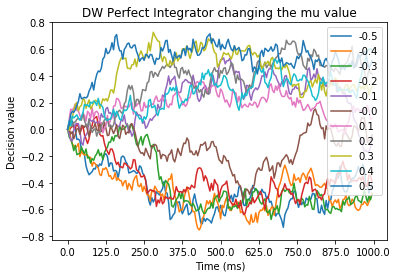

In [24]:
# Defining the values used for this simulation
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6
step = 0.1
per_error_list = []
# The mu value will be varied from the start mu value to the final mu value, separated by the step value:
for mu in np.arange(start_mu, final_mu, step):
    # In this error_list, 0 will be stored if the sign of the mu value and the decision making are equal, and 1 will be stored if they are different:
    error_list = []
    for z in range(999):
        # The starting decision value will be 0:
        x = 0
        decision_value = [x]
        # The process will be repeated a two hundred times (1 second stimulus)
        for i in range(199):
            # Normal random distribution noise:
            xi_s = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # All x will be stored in the deccision value list:
            decision_value.append(x)
        
        # The boolean value of  the decision veing positive or negative will be calculated: 
        positive_decision = decision_value[len(decision_value)-1][0]>=0
        negative_decision = decision_value[len(decision_value)-1][0]<0
        positive_mu = mu>=0
        negative_mu = mu<0

        # If the last decision value and the mu have the same sign, there will be no error (0 will be stored), if they are different there will be error (1 will be stored)
        if positive_decision == positive_mu or negative_decision  == negative_mu:
            error_list.append(0)
        else:
            error_list.append(1)
        if z == 1:
            # Plotting the decision value over time:
            plt.plot(np.arange(0,200,1),decision_value,label = round(mu,2))           
            plt.title("DW Perfect Integrator changing the mu value")
            plt.xlabel("Time (ms)")
            positions = [200/8*n for n in range(9)]
            labels = [1000/8*n for n in range(9)]
            plt.xticks(positions, labels)
            plt.ylabel("Decision value")
            plt.legend()
    per_error = sum(error_list)/len(error_list)*100
    per_error_list.append(100-per_error)
    #print("The incorrect decision is made", round(per_error,2), "% of the times for the mu value = ", round(mu,3))

[-0.5, 0.5, 0, 100]

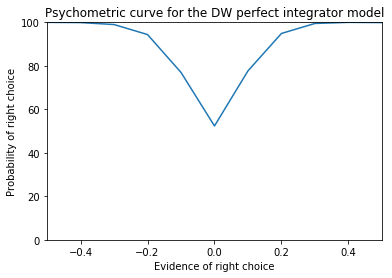

In [25]:
plt.plot(np.arange(start_mu, final_mu, step),per_error_list)
plt.ylabel("Probability of right choice")
plt.xlabel("Evidence of right choice")
plt.title("Psychometric curve for the DW perfect integrator model")
plt.axis([-0.5,0.5,0,100])

Then mu will be set to a fixed value, and the sigma will be varied. The error percentage will be computed for each sigma (for 1000 iterations).

KeyboardInterrupt: 

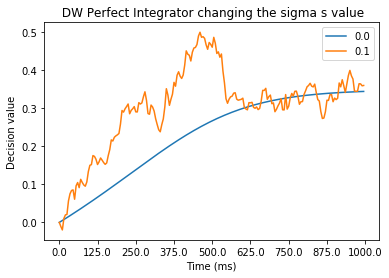

In [15]:
# Defining the values used for this simulation
mu = 0.1
start_sigma_s = 0
final_sigma_s = 0.5
step = 0.1
per_error_list = []
# The mu value will be varied from the start mu value to the final mu value, separated by the step value:
for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    for z in range(999):
        # The starting decision value will be 0:
        x = 0
        decision_value = [x]
        # The process will be repeated a two hundred times (1 second stimulus)
        for i in range(199):
            # Normal random distribution noise:
            xi_s = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # All x will be stored in the deccision value list:
            decision_value.append(x)

        # The boolean value of  the decision veing positive or negative will be calculated: 
        positive_decision = decision_value[len(decision_value)-1][0]>=0
        negative_decision = decision_value[len(decision_value)-1][0]<0
        positive_mu = mu>=0
        negative_mu = mu<0

        # If the last decision value and the mu have the same sign, there will be no error (0 will be stored), if they are different there will be error (1 will be stored)
        if positive_decision == positive_mu or negative_decision  == negative_mu:
            error_list.append(0)
        else:
            error_list.append(1)
        if z == 1:
            # Plotting the decision value over time:
            plt.plot(np.arange(0,200,1),decision_value,label = round(sigma_s,2))           
            plt.title(" DW Perfect Integrator changing the sigma s value")
            plt.xlabel("Time (ms)")
            positions = [200/8*n for n in range(9)]
            labels = [1000/8*n for n in range(9)]
            plt.xticks(positions, labels)
            plt.ylabel("Decision value")
            plt.legend()
    # Printing the error for each mu
    per_error = sum(error_list)/len(error_list)*100
    per_error_list.append(100-per_error)
    #print("The incorrect decision is made", round(per_error,2), "% of the times for the sigma s value = ", round(sigma_s,3))


Text(0.5,1,'Accuracy over sigma_s value for the DW perfect integrator model')

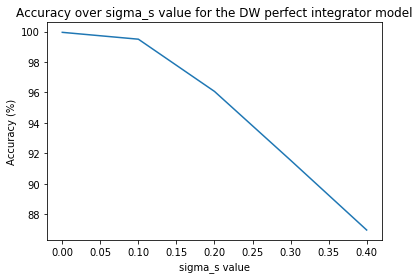

In [10]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),per_error_list)
plt.ylabel("Accuracy (%)")
plt.xlabel("sigma_s value")
plt.title("Accuracy over sigma_s value for the DW perfect integrator model")

## DW Absorbing
In the first simulation the mu value will be varied from the start mu value to the final mu value, and the error of each mu value will be computed (for a thousand iterations):

[0, 124.875, -0.6, 0.6]

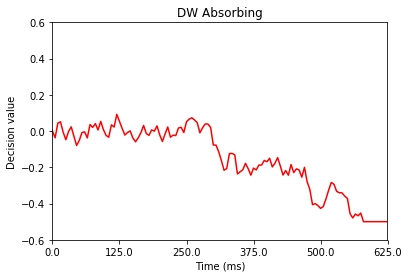

In [16]:
# Defining the values used for this simulation
sigma_s = 0.25
mu = 0.1
bound = 0.5
bound1 = -0.5


# The starting decision value will be 0:
x = 0
decision_value = [x]
# Starting with the condition that the bound hasn't been reached
reached_bound = False
# While the bound hasn't been reached, the equation will be performed over time       
while reached_bound == False:
    # Normal random distribution noise:
    xi_s = np.random.randn(1)
    # Solved differential diffusion equation:
    x = x - (tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
    # When the bound is reached, the rest of the decision value will be the bound value
    if x >= bound:
        if len(decision_value)<200:
            reached_bound = True
            for i in range(199-len(decision_value)):
                decision_value.append(bound)
        # When the iterations are over 200, break the loop:
        else:
            break
    if x <= bound1:
        if len(decision_value)<200:
            reached_bound = True
            for i in range(200-len(decision_value)):
                decision_value.append(bound1)
        # When the iterations are over 200, break the loop:
        else:
            break
    else:
        # All x before reaching the bound value will be stored in the deccision value list:
        decision_value.append(x)
    # If the bound hasn't been reached and its over 200 iterations, break the loop
    if len(decision_value)==200:
        break
plt.plot(np.arange(0,200,1),decision_value,"r")           
plt.title("DW Absorbing")
plt.xlabel("Time (ms)")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")
plt.axis([0,999/8,-0.6,0.6])

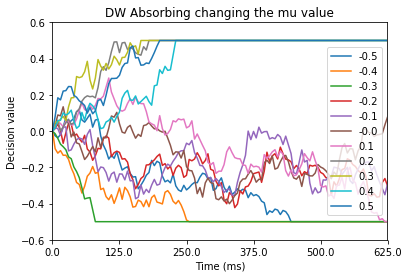

In [22]:
# Defining the values used for this simulation
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6
step = 0.1
bound = 0.5
bound1 = -0.5
per_error_list = []

# The mu value will be varied from the start mu value to the final mu value, separated by the step value:
for mu in np.arange(start_mu, final_mu, step):
    # In this error_list, 0 will be stored if the sign of the mu value and the decision making are equal, and 1 will be stored if they are different:
    error_list = []
    for z in range(999):
        # The starting decision value will be 0:
        x = 0
        decision_value = [x]
        # Starting with the condition that the bound hasn't been reached
        reached_bound = False
        # While the bound hasn't been reached, the equation will be performed over time       
        while reached_bound == False:
            # Normal random distribution noise:
            xi_s = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # When the bound is reached, the rest of the decision value will be the bound value
            if x >= bound:
                if len(decision_value)<200:
                    reached_bound = True
                    for i in range(199-len(decision_value)):
                        decision_value.append(bound)
                # When the iterations are over 200, break the loop:
                else:
                    break
            if x <= bound1:
                if len(decision_value)<200:
                    reached_bound = True
                    for i in range(200-len(decision_value)):
                        decision_value.append(bound1)
                # When the iterations are over 200, break the loop:
                else:
                    break
            else:
                # All x before reaching the bound value will be stored in the deccision value list:
                decision_value.append(x)
            # If the bound hasn't been reached and its over 200 iterations, break the loop
            if len(decision_value)==200:
                break
        
        # The boolean value of  the decision veing positive or negative will be calculated: 
        positive_decision = decision_value[len(decision_value)-1]>=0
        negative_decision = decision_value[len(decision_value)-1]<0
        positive_mu = mu>=0
        negative_mu = mu<0

        # If the last decision value and the mu have the same sign, there will be no error (0 will be stored), if they are different there will be error (1 will be stored)
        if positive_decision == positive_mu or negative_decision  == negative_mu:
            error_list.append(0)
        else:
            error_list.append(1)
        # Only for one iteration the decision value will be plotted
        if z == 1:
            # Plotting the decision value over time:
            plt.plot(np.arange(0,200,1),decision_value,label = round(mu,2))           
            plt.title("DW Absorbing changing the mu value")
            plt.xlabel("Time (ms)")
            positions = [200/8*n for n in range(9)]
            labels = [1000/8*n for n in range(9)]
            plt.xticks(positions, labels)
            plt.ylabel("Decision value")
            plt.legend()
            plt.axis([0,999/8,-0.6,0.6])
    per_error = sum(error_list)/len(error_list)*100
    per_error_list.append(100-per_error)
    #print("The incorrect decision is made", round(per_error,2), "% of the times for the mu value = ", round(mu,3))

[-0.5, 0.5, 0, 100]

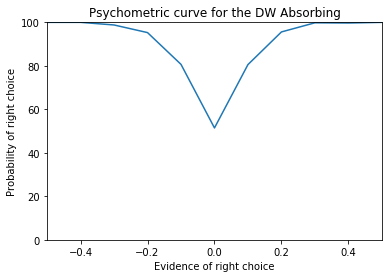

In [23]:
plt.plot(np.arange(start_mu, final_mu, step),per_error_list)
plt.ylabel("Probability of right choice")
plt.xlabel("Evidence of right choice")
plt.title("Psychometric curve for the DW Absorbing")
plt.axis([-0.5,0.5,0,100])

Then mu will be set to a fixed value, and the sigma will be varied. The error percentage will be computed for each sigma (for 1000 iterations).

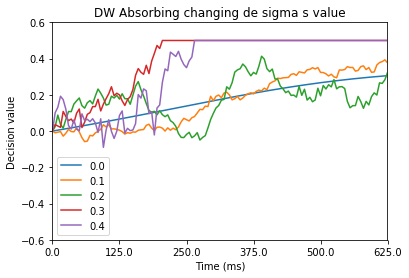

In [14]:
# Defining the values used for this simulation
mu = 0.1
start_sigma_s = 0
final_sigma_s = 0.5
step = 0.1
bound = 0.5
bound1 = -0.5
per_error_list = []
# The mu value will be varied from the start mu value to the final mu value, separated by the step value:
for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    # In this error_list, 0 will be stored if the sign of the mu value and the decision making are equal, and 1 will be stored if they are different:
    error_list = []
    for z in range(999):
        # The starting decision value will be 0:
        x = 0
        decision_value = [x]
        reached_bound = False
        # The process will be repeated two hundred times (1 second stimulus)
        
        while reached_bound == False:
            # Normal random distribution noise:
            xi_s = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # If the bound is reached:
            if x >= bound:
                if len(decision_value)<200:
                    reached_bound = True
                    for i in range(199-len(decision_value)):
                        decision_value.append(bound)
                # When iterations are 200:
                else:
                    break
            if x <= bound1:
                if len(decision_value)<200:
                    reached_bound = True
                    for i in range(200-len(decision_value)):
                        decision_value.append(bound1)
            else:
                # All x before reaching the bound value will be stored in the deccision value list:
                decision_value.append(x)
            # When iterations are 200:
            if len(decision_value)==200:
                break
        
        # The boolean value of  the decision veing positive or negative will be calculated: 
        positive_decision = decision_value[len(decision_value)-1]>=0
        negative_decision = decision_value[len(decision_value)-1]<0
        positive_mu = mu>=0
        negative_mu = mu<0

        # If the last decision value and the mu have the same sign, there will be no error (0 will be stored), if they are different there will be error (1 will be stored)
        if positive_decision == positive_mu or negative_decision  == negative_mu:
            error_list.append(0)
        else:
            error_list.append(1)
        if z == 1:
            # Plotting the decision value over time:
            plt.plot(np.arange(0,200,1),decision_value,label = round(sigma_s,2))           
            plt.title("DW Absorbing changing de sigma s value")
            plt.xlabel("Time (ms)")
            positions = [200/8*n for n in range(9)]
            labels = [1000/8*n for n in range(9)]
            plt.xticks(positions, labels)
            plt.ylabel("Decision value")
            plt.legend()
            plt.axis([0,999/8,-0.6,0.6])
    per_error = sum(error_list)/len(error_list)*100
    per_error_list.append(100-per_error)
    #print("The incorrect decision is made", round(per_error,2), "% of the times for the sigma s value = ", round(sigma_s,3))

Text(0.5,1,'Accuracy over sigma_s value for the DW Absorbing model')

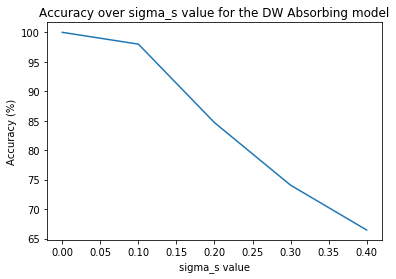

In [15]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),per_error_list)
plt.ylabel("Accuracy (%)")
plt.xlabel("sigma_s value")
plt.title("Accuracy over sigma_s value for the DW Absorbing model")

## DDM reflecting
In the first simulation the mu value will be varied from the start mu value to the final mu value, and the error of each mu value will be computed (for a thousand iterations):

Text(0,0.5,'Decision value')

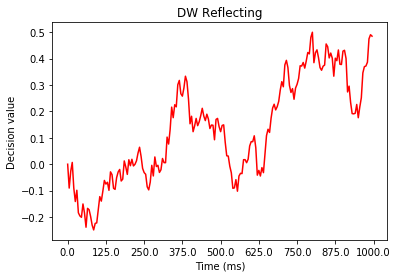

In [19]:
# Defining the values used for this simulation
sigma_s = 0.25
mu = 0.1
# The starting decision value will be 0:
x = 0
decision_value = [x]
# The process will be repeated two hundred times (1 second stimulus)
for i in range(199):
    # Normal random distribution noise:
    xi_s = np.random.randn(1)
    # Solved differential diffusion equation:
    x = x - (tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
    # If the bound is exceeded, it will return the value of the bound
    if x> bound:
        decision_value.append(bound)
    elif x < bound1:
        decision_value.append(bound1)
    else:
        decision_value.append(x)
# Plotting the decision value over time:
plt.plot(np.arange(0,200,1),decision_value,"r")           
plt.title("DW Reflecting")
plt.xlabel("Time (ms)")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
plt.xticks(positions, labels)
plt.ylabel("Decision value")


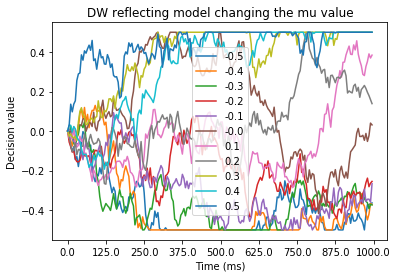

In [20]:
# Defining the values used for this simulation
sigma_s = 0.25
start_mu = -0.5
final_mu = 0.6
step = 0.1
per_error_list = []
# The mu value will be varied from the start mu value to the final mu value, separated by the step value:
for mu in np.arange(start_mu, final_mu, step):
    # In this error_list, 0 will be stored if the sign of the mu value and the decision making are equal, and 1 will be stored if they are different:
    error_list = []
    for z in range(999):
        # The starting decision value will be 0:
        x = 0
        decision_value = [x]
        # The process will be repeated two hundred times (1 second stimulus)
        for i in range(199):
            # Normal random distribution noise:
            xi_s = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # If the bound is exceeded, it will return the value of the bound
            if x> bound:
                decision_value.append(bound)
            elif x < bound1:
                decision_value.append(bound1)
            else:
                decision_value.append(x)
        
        # The boolean value of  the decision veing positive or negative will be calculated: 
        positive_decision = decision_value[len(decision_value)-1]>=0
        negative_decision = decision_value[len(decision_value)-1]<0
        positive_mu = mu>=0
        negative_mu = mu<0

        # If the last decision value and the mu have the same sign, there will be no error (0 will be stored), if they are different there will be error (1 will be stored)
        if positive_decision == positive_mu or negative_decision  == negative_mu:
            error_list.append(0)
        else:
            error_list.append(1)
        # Only for one iteration
        if z == 1:
            # Plotting the decision value over time:
            plt.plot(np.arange(0,200,1),decision_value,label = round(mu,2))           
            plt.title("DW reflecting model changing the mu value")
            plt.xlabel("Time (ms)")
            positions = [200/8*n for n in range(9)]
            labels = [1000/8*n for n in range(9)]
            plt.xticks(positions, labels)
            plt.ylabel("Decision value")
            plt.legend()
    per_error = sum(error_list)/len(error_list)*100
    per_error_list.append(100-per_error)
    #print("The incorrect decision is made", round(per_error,2), "% of the times for the mu value = ", round(mu,3))

[-0.5, 0.5, 0, 100]

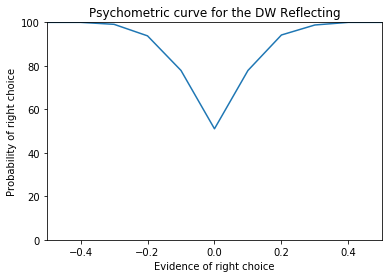

In [21]:
plt.plot(np.arange(start_mu, final_mu, step),per_error_list)
plt.ylabel("Probability of right choice")
plt.xlabel("Evidence of right choice")
plt.title("Psychometric curve for the DW Reflecting")
plt.axis([-0.5,0.5,0,100])

Then mu will be set to a fixed value, and the sigma will be varied. The error percentage will be computed for each sigma (for 1000 iterations).

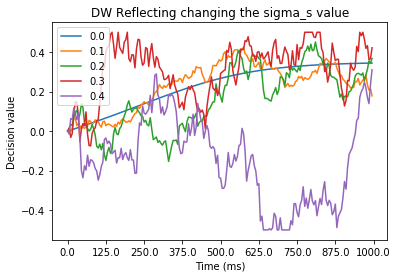

In [19]:
# Defining the values used for this simulation
mu = 0.1
start_sigma_s = 0
final_sigma_s = 0.5
step = 0.1
bound = 0.5
bound1 = -0.5
per_error_list = []
# The mu value will be varied from the start mu value to the final mu value, separated by the step value:
for sigma_s in np.arange(start_sigma_s, final_sigma_s, step):
    # In this error_list, 0 will be stored if the sign of the mu value and the decision making are equal, and 1 will be stored if they are different:
    error_list = []
    for z in range(999):
        # The starting decision value will be 0:
        x = 0
        decision_value = [x]
        # The process will be repeated two hundred times (1 second stimulus)
        for i in range(199):
            # Normal random distribution noise:
            xi_s = np.random.randn(1)
            # Solved differential diffusion equation:
            x = x - (tf/tau)*(-mu-alfa*x*2+4*x**3)+np.sqrt(tf/tau)*(sigma_i*xi_i+sigma_s*xi_s)
            # If the bound is exceeded it will return the value of the bound
            if x> bound:
                decision_value.append(bound)
            elif x < bound1:
                decision_value.append(bound1)
            else:
                decision_value.append(x)
        
        # The boolean value of  the decision veing positive or negative will be calculated: 
        positive_decision = decision_value[len(decision_value)-1]>=0
        negative_decision = decision_value[len(decision_value)-1]<0
        positive_mu = mu>=0
        negative_mu = mu<0

        # If the last decision value and the mu have the same sign, there will be no error (0 will be stored), if they are different there will be error (1 will be stored)
        if positive_decision == positive_mu or negative_decision  == negative_mu:
            error_list.append(0)
        else:
            error_list.append(1)
        # Only for one itration
        if z == 1:
            # Plotting the decision value over time:
            plt.plot(np.arange(0,200,1),decision_value,label = round(sigma_s,2))           
            plt.title("DW Reflecting changing the sigma_s value")
            plt.xlabel("Time (ms)")
            positions = [200/8*n for n in range(9)]
            labels = [1000/8*n for n in range(9)]
            plt.xticks(positions, labels)
            plt.ylabel("Decision value")
            plt.legend()
    per_error = sum(error_list)/len(error_list)*100
    per_error_list.append(100-per_error)
    #print("The incorrect decision is made", round(per_error,2), "% of the times for the sigma s value = ", round(sigma_s,3))

Text(0.5,1,'Accuracy over sigma_s value for the DW Reflecting model')

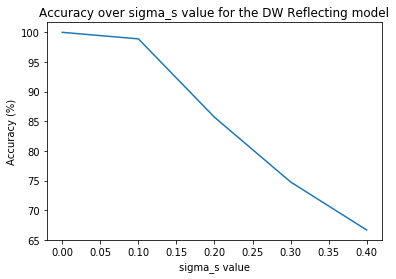

In [20]:
plt.plot(np.arange(start_sigma_s, final_sigma_s, step),per_error_list)
plt.ylabel("Accuracy (%)")
plt.xlabel("sigma_s value")
plt.title("Accuracy over sigma_s value for the DW Reflecting model")